In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('seaborn-dark')

In [2]:
matches=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\matches.csv',parse_dates=['date'])
deliveries=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\deliveries.csv')
deliveries.wide_runs.replace(0,np.nan,inplace=True)

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Q1

In [4]:
csk_kkr=matches[((matches.team1=='Chennai Super Kings') | (matches.team2=='Chennai Super Kings')) & ((matches.team1=='Kolkata Knight Riders') | (matches.team2=='Kolkata Knight Riders'))].copy()
csk=matches[(matches.team1=='Chennai Super Kings') | (matches.team2=='Chennai Super Kings')].copy()
kkr=matches[(matches.team1=='Kolkata Knight Riders') | (matches.team2=='Kolkata Knight Riders')].copy()
csk_kkr.shape,csk.shape,kkr.shape

((20, 18), (164, 18), (178, 18))

In [5]:
csk_kkrdeli=deliveries[((deliveries.batting_team=='Chennai Super Kings') | (deliveries.bowling_team=='Chennai Super Kings')) & ((deliveries.batting_team=='Kolkata Knight Riders') | (deliveries.bowling_team=='Kolkata Knight Riders'))].copy()
cskdeli=deliveries[(deliveries.batting_team=='Chennai Super Kings') | (deliveries.bowling_team=='Chennai Super Kings')].copy()
kkrdeli=deliveries[(deliveries.batting_team=='Kolkata Knight Riders') | (deliveries.bowling_team=='Kolkata Knight Riders')].copy()
csk_kkrdeli.shape,cskdeli.shape,kkrdeli.shape

((4665, 21), (39318, 21), (41798, 21))

In [6]:
csk_kkr.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
70,71,2008,Chennai,2008-04-26,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,0,Chennai Super Kings,0,9,JDP Oram,"MA Chidambaram Stadium, Chepauk",BF Bowden,AV Jayaprakash,NaN
102,103,2008,Kolkata,2008-05-18,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,1,Chennai Super Kings,3,0,M Ntini,Eden Gardens,Asad Rauf,K Hariharan,NaN
165,166,2009,Centurion,2009-05-18,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,7,BJ Hodge,SuperSport Park,SJA Taufel,RB Tiffin,NaN
181,182,2010,Kolkata,2010-03-16,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Chennai Super Kings,55,0,MS Dhoni,Eden Gardens,HDPK Dharmasena,AM Saheba,NaN
221,222,2010,Chennai,2010-04-13,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,0,Chennai Super Kings,0,9,R Ashwin,"MA Chidambaram Stadium, Chepauk",SS Hazare,SJA Taufel,NaN


In [7]:
csk.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
60,61,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
66,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
70,71,2008,Chennai,2008-04-26,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,0,Chennai Super Kings,0,9,JDP Oram,"MA Chidambaram Stadium, Chepauk",BF Bowden,AV Jayaprakash,NaN
73,74,2008,Bangalore,2008-04-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin,NaN
78,79,2008,Chennai,2008-05-02,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Delhi Daredevils,0,8,V Sehwag,"MA Chidambaram Stadium, Chepauk",BF Bowden,K Hariharan,NaN


In [8]:
kkr.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
10,11,2017,Kolkata,2017-04-13,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
17,18,2017,Delhi,2017-04-17,Delhi Daredevils,Kolkata Knight Riders,Delhi Daredevils,bat,normal,0,Kolkata Knight Riders,0,4,NM Coulter-Nile,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN


In [9]:
def cat_plot(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(nrows=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],color='indigo')
        ax[i].set_title(columns[i])

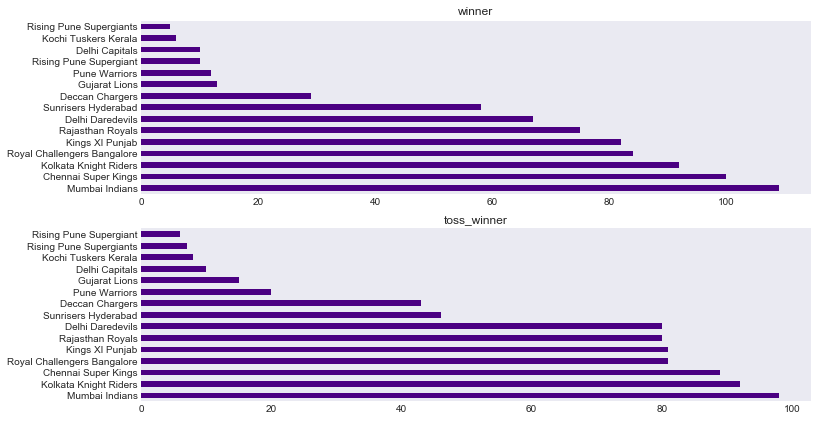

In [10]:
cat_plot(matches,['winner','toss_winner'],(12,7),'barh')

In [11]:
def cat_plot(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(ncols=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],colors=['azure','skyblue'],autopct='%2.f%%')
        ax[i].set_title(columns[i])

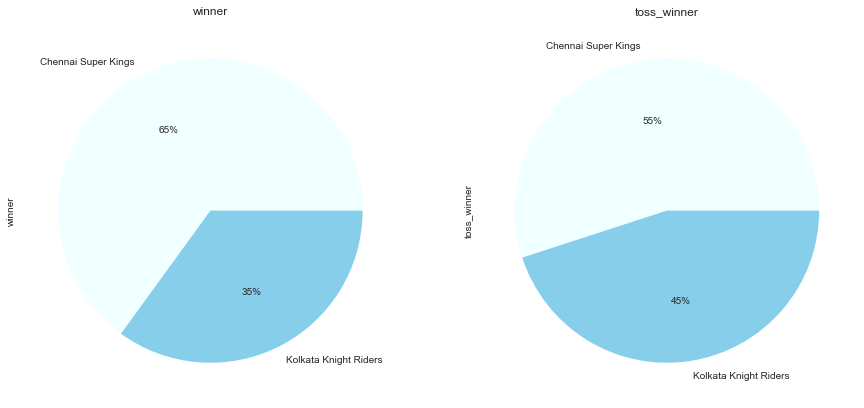

In [12]:
cat_plot(csk_kkr,['winner','toss_winner'],(15,8),'pie')

### As it is evident from the above exploration CSK will most probably win the match

# Q2

In [13]:
 csk_kkrdeli.groupby(['match_id']).agg({'total_runs':'sum',
                                        'ball':'count'})
# kkr75=csk_kkrdeli.query('batting_team=="Kolkata Knight Riders"')[['ball','total_runs']]

# kkr75

,total_runs,ball
match_id,,
71,299,233
103,204,175
166,377,250
182,273,240
222,282,212
235,304,244
281,175,186
347,279,250
368,318,242


# Q3

In [14]:
chahar_out=deliveries[deliveries.batsman=='DL Chahar'].groupby(['match_id','over','ball'],as_index=False).count()
chahar_out.head()

,match_id,over,ball,inning,batting_team,bowling_team,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,9,13,2,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
1,9,13,3,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
2,9,13,5,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
3,9,13,6,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
4,9,14,4,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0


In [15]:

def wickounter():
    val=[]
    counter=0
    for i in chahar_out.dismissal_kind:
        if i==0:
            counter+=1
        else:
            val.append((counter,'out'))
            #val.append('out')
            counter=0
    return val



wickounter()

[(5, 'out'), (0, 'out'), (22, 'out'), (5, 'out'), (6, 'out'), (2, 'out')]

In [16]:
arr=[]
for _ in wickounter():
    arr.append(_[0])
arr=np.array(arr)
arr


array([ 5,  0, 22,  5,  6,  2])

In [17]:
print(arr.mean(),'\n\n',arr.std())

6.666666666666667 

 7.156970184527963


### From the above analysis we can't produce any result even near to the acual outcome as there are only 6 rows where deepak chahal got out but we will go with the mean for the while and choose 0-7

# Q4

In [18]:
over64=csk_kkrdeli.query('batsman_runs==6 | batsman_runs==4').groupby(['match_id','over','batsman_runs'],as_index=False).sum()
over64.head()

,match_id,over,batsman_runs,inning,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs,total_runs
0,71,1,4,3,12,0,0.0,0,0,0,0,0,8
1,71,2,4,2,10,0,0.0,0,0,0,0,0,8
2,71,2,6,1,5,0,0.0,0,0,0,0,0,6
3,71,3,4,2,2,0,0.0,0,0,0,0,0,4
4,71,3,6,1,2,0,0.0,0,0,0,0,0,6


In [22]:
over64_count=pd.concat([over64[['match_id','over']],pd.get_dummies(over64.batsman_runs)],axis=1)
over64_count.head()

,match_id,over,4,6
0,71,1,1,0
1,71,2,1,0
2,71,2,0,1
3,71,3,1,0
4,71,3,0,1


In [23]:
over64_count=over64_count.groupby(['match_id','over']).sum()
over64_count=over64_count[(over64_count[4]==1) & (over64_count[6]==1)]
over64_count

4  6
match_id over      
71       2     1  1
         3     1  1
         6     1  1
         17    1  1
166      3     1  1
...           .. ..
11314    20    1  1
11320    3     1  1
         11    1  1
         14    1  1
         15    1  1

[103 rows x 2 columns]

Text(0.5, 1.0, 'Distribution frequency of number of overs in which botha 6 and a 4 will be hit')

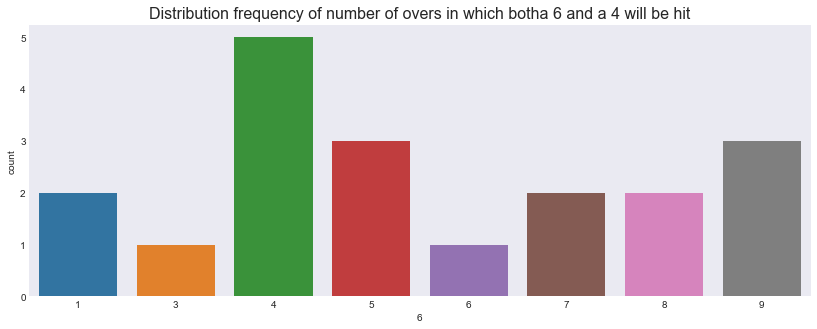

In [24]:
plt.figure(figsize=(14,5))
sns.countplot(over64_count.groupby('match_id').count().iloc[:,1])
plt.title('Distribution frequency of number of overs in which botha 6 and a 4 will be hit',fontsize=16)
# plt.axis('scaled')

### From the above observation we can assume that there will be around 4-5 such overs.

# Q5

In [25]:
noball_count=csk_kkrdeli.groupby(['match_id']).noball_runs.sum()
noball_count.describe()

count    20.000000
mean      0.800000
std       1.005249
min       0.000000
25%       0.000000
50%       0.500000
75%       1.000000
max       3.000000
Name: noball_runs, dtype: float64

Text(0.5, 1.0, 'Distribution frequency of no balls')

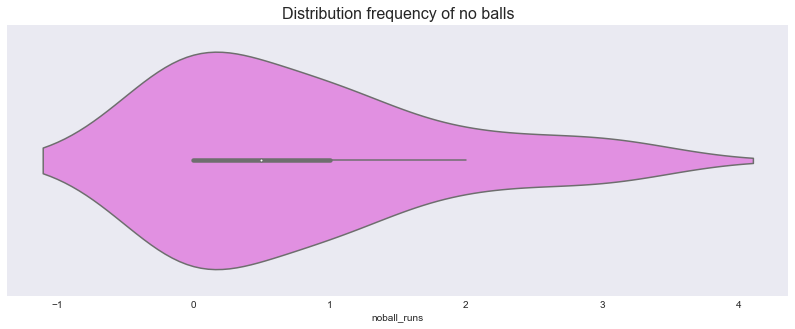

In [26]:
plt.figure(figsize=(14,5))
sns.violinplot(noball_count,color='violet')
plt.title('Distribution frequency of no balls',fontsize=16)

### There are high chances of only 0-1 no balls getting bowled in the match